In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from utils import *
from Autoencoder import *
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Parameter Definition

In [2]:
del_all_flags(tf.flags.FLAGS)
flags = tf.flags
PARAMETERS = flags.FLAGS
flags.DEFINE_string('f', '', 'kernel') # used in jupyter
flags.DEFINE_float('learning_rate', 1e-3, 'Learning rate for training')
flags.DEFINE_integer('batch_size', 64, 'Batch size for both training and testing')
flags.DEFINE_integer('num_epochs', 50, 'Number of epochs in training phase')
flags.DEFINE_float('train_proportion', 0.8, 'Proportion of examples to consider for training only.')
flags.DEFINE_integer('feature_size', 2, 'Feature size learned by the network')
flags.DEFINE_string('loss_type', 'mse', 'Desired loss function to train (mse, bce)')
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

### Load MNIST dataset

In [3]:
# load mnist data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int64)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype = np.int64)

Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
np.random.seed(1)

# hold out split - by default: 80% training and 20% validation
train_data, train_labels, val_data, val_labels = partition_train_set(data, labels, PARAMETERS.train_proportion)

### Initialize and Train Model

In [5]:
tf.reset_default_graph()
tf.set_random_seed(1)
# initialize autoencoder model
ae = Autoencoder(PARAMETERS)

In [6]:
# train the model with the mnist data
history_loss = ae.train(train_data, val_data)

Training phase...
(Epoch 1 / 50) Training Loss: 0.05462; Validation Loss: 0.04624
(Epoch 2 / 50) Training Loss: 0.04426; Validation Loss: 0.04243
(Epoch 3 / 50) Training Loss: 0.04166; Validation Loss: 0.04061
(Epoch 4 / 50) Training Loss: 0.04026; Validation Loss: 0.03959
(Epoch 5 / 50) Training Loss: 0.03925; Validation Loss: 0.03892
(Epoch 6 / 50) Training Loss: 0.03859; Validation Loss: 0.03828
(Epoch 7 / 50) Training Loss: 0.03790; Validation Loss: 0.03786
(Epoch 8 / 50) Training Loss: 0.03737; Validation Loss: 0.03737
(Epoch 9 / 50) Training Loss: 0.03693; Validation Loss: 0.03693
(Epoch 10 / 50) Training Loss: 0.03658; Validation Loss: 0.03671
(Epoch 11 / 50) Training Loss: 0.03637; Validation Loss: 0.03651
(Epoch 12 / 50) Training Loss: 0.03608; Validation Loss: 0.03628
(Epoch 13 / 50) Training Loss: 0.03579; Validation Loss: 0.03625
(Epoch 14 / 50) Training Loss: 0.03560; Validation Loss: 0.03602
(Epoch 15 / 50) Training Loss: 0.03537; Validation Loss: 0.03596
(Epoch 16 / 50) 

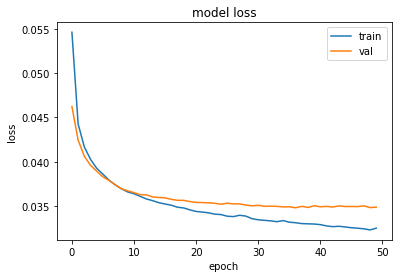

In [7]:
# plot the history train/val loss
plot_train_history_loss(history_loss)

### Test Model

In [8]:
# test the model
ae.test(test_data)

Testing phase...
Testing Loss: 0.035111



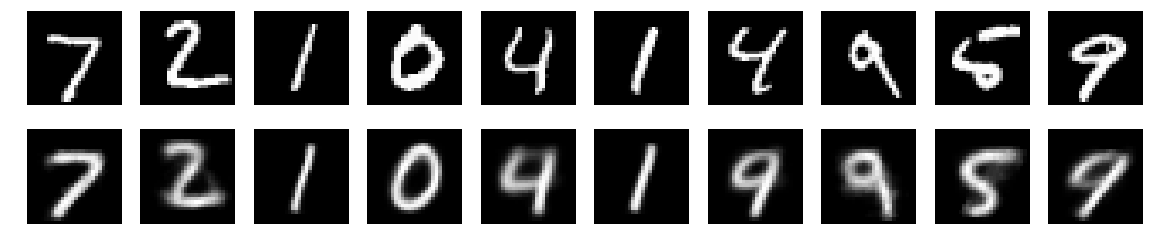

In [9]:
# reconstruct some data
test_batch_data = test_data[:10]
reconstructed = ae.reconstruct_data(test_batch_data)  
display_reconstructed(test_batch_data, reconstructed, 10)

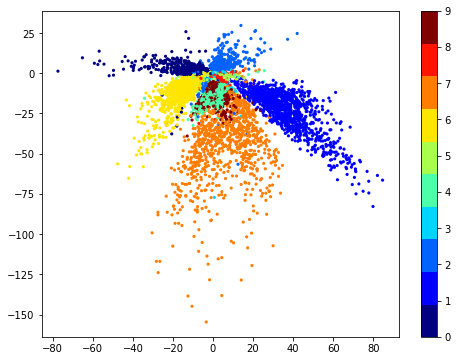

In [10]:
# plot the latent space
fig = ae.plot_latent_space(test_data[:10000], test_labels[:10000])